## Problem Set #2
### MACS 30100, Dr. Evans
#### Name: Xiang Zhang
#### snzhang@uchicago.edu

### Problem1: Some income data, lognormal distribution, and hypothesis testing (6points).

Let's first read in data as a numpy array

In [3]:
import numpy as np
import scipy.stats as sts

wages = np.loadtxt('incomes.txt')

#### (a) Plot a histogram
The code below generates a histogram depicting the income distribution of MACSS students.

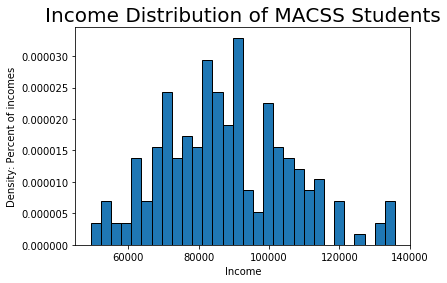

In [4]:
import matplotlib.pyplot as plt 
count, bins, patches = plt.hist(wages, 30, edgecolor='black', normed=True)
plt.title("Income Distribution of MACSS Students", fontsize = 20)
plt.ylabel("Density: Percent of incomes")
plt.xlabel("Income")
plt.show()

#### (b) Plot the lognormal PDF and compute log likelihood value

The code below generate the lognormal pdf when $\mu = 11.0$ and $\sigma = 0.5$ for $0 < x < 150000$

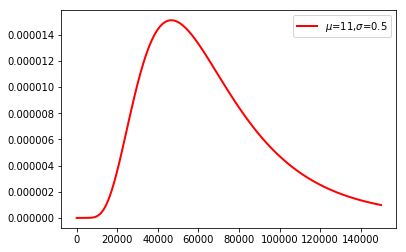

In [5]:
def lognorm_pdf(xvals, mu, sigma):
    '''
    ------------------------------------------------------------------------
    Generate pdf values from the log normal pdf with parameter mu and sigma. 
    ------------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, parameter mu in log normal distribution
    sigma  = scalar > 0, parameter sigma in log normal distribution
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:

    pdf_vals = (N,) vector, log normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
            
    pdf_vals    = (1/(xvals * sigma * np.sqrt(2 * np.pi) ) *
                   np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals
                   
dist_pts = np.linspace(1e-10, 150000, 1000)
mu = 11.0
sigma = 0.5

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu, sigma),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')
plt.show()


The code below compute the log likelihood value

In [6]:
def log_lik_lognorm(xvals, mu, sigma):
    '''
    Function used to generate log likelihood for log normal distribution
    '''
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [8]:
print('Log-likelihood for $\mu = 11.0$, $\sigma$ = 0.5 is:', log_lik_lognorm(wages, mu, sigma))

Log-likelihood for $\mu = 11.0$, $\sigma$ = 0.5 is: -2385.85699781


#### (c) maximum likelihood

I first set up criterion function, and then maximize log likelihood (minimize negative log likelihood)

In [9]:
# Define criterion function
def crit(params, xvals):
    '''
    Criterion function
    '''
    mu, sigma = params
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [10]:
import scipy.optimize as opt

mu_init = 11.0
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = wages

results = opt.minimize(crit, params_init, args=mle_args, method='L-BFGS-B',
                       bounds=((None, None), (0.1, None)))

mu_MLE, sig_MLE = results.x
print("The ML estimates are listed below:")
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print("Log Likelihood", -results.fun)

The ML estimates are listed below:
mu_MLE= 11.3590244083  sig_MLE= 0.208178530816
Log Likelihood -2241.71930137


I plot the estimated PDf for ML estimates, PDF in part (b) and histogram in part (a) below

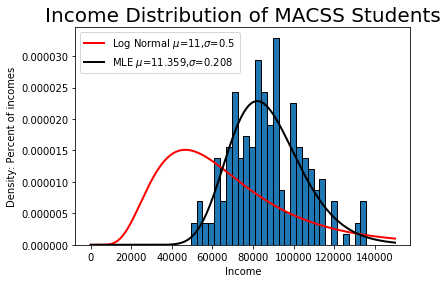

In [12]:
count, bins, patches = plt.hist(wages, 30, edgecolor='black', normed=True)
plt.title("Income Distribution of MACSS Students", fontsize = 20)
plt.ylabel("Density: Percent of incomes")
plt.xlabel("Income")

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu, sigma),
         linewidth=2, color='r', label='Log Normal $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='k', label='MLE $\mu$=11.359,$\sigma$=0.208')
plt.legend(loc='upper left')

plt.show()

Below I compute the vaiance-covariace matrix

In [263]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])

vcv_mle = results.hess_inv.todense() * OffDiagNeg
print(vcv_mle)

[[  2.52837320e-04  -2.76193333e-05]
 [ -2.76193333e-05   1.30456624e-04]]


#### (d) Log likelihood ratio test

In [13]:
log_lik_h0 = log_lik_lognorm(wages, 500, 180)
log_lik_mle = log_lik_lognorm(wages, 11.0, 0.5)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('The log likelihood ratio for two esimation is:', log_lik_h0, 'and', log_lik_mle)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

The log likelihood ratio for two esimation is: -4231.12826931 and -2385.85699781
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Based on the chi-square test result, we should reject the null, that the data in `incomes.txt` is unlikely to came from the distribution in part

#### (e) Inference on My Own Income

Using the estimated distribution, I do some predictions on my own income below.

In [14]:
prob_greaterthan_100000 = 1 - sts.lognorm.cdf(100000, sig_MLE, loc = 0, scale = np.exp(mu_MLE))
prob_lessthan_75000 = sts.lognorm.cdf(75000, sig_MLE, loc = 0, scale = np.exp(mu_MLE))

print('The probability of earning more than $100000 is:', prob_greaterthan_100000)
print('The probability of earning less than $75000 is:', prob_lessthan_75000)

The probability of earning more than $100000 is: 0.229870198195
The probability of earning less than $75000 is: 0.260233280491


### Problem 2

Let's first read in the data

In [17]:
import pandas as pd

sicks = pd.read_csv("sick.txt")

In [18]:
def log_likelihood(dataset, beta, sigma):
    y = dataset["sick"]
    n = len(y)
    x = dataset.iloc[:, 1:4]
    
    error_term = (y - beta[0] - np.sum(x * np.array(beta[1:4]), axis = 1)) ** 2
    error_term_sum = error_term.sum()
    
    log_lik_val = -n / 2 * np.log(2 * np.pi * sigma ** 2) - 1 / (2 * sigma ** 2) * error_term_sum
    
    return log_lik_val

In [19]:
def crit(params, x):
    '''
    Criterion function
    '''
    beta, sigma = params[0:4], params[4]
    return -log_likelihood(x, beta, sigma)

In [20]:
params_init = np.array([1, 2, 3, 4, 5])

results = opt.minimize(crit, params_init, args = sicks, method='L-BFGS-B',
                       bounds=((None, None), (None, None), (None, None), (None, None), (1e-10, None)))

In [21]:
results

      fun: -876.8650642258458
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.19042545,  10.23726099,   0.20517064,  14.76372518,   1.11648433])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 936
      nit: 76
   status: 0
  success: True
        x: array([ 0.25164464,  0.01293345,  0.40050119, -0.00999169,  0.00301771])

In [22]:
print("The estimated coefficients are:")
print("beta_0 = ", results.x[0])
print("beta_1 = ", results.x[1])
print("beta_2 = ", results.x[2])
print("beta_3 = ", results.x[3])
print("sigma  = ", results.x[4])

The estimated coefficients are:
beta_0 =  0.251644643935
beta_1 =  0.0129334495432
beta_2 =  0.400501189881
beta_3 =  -0.00999169254856
sigma  =  0.00301770977442


In [31]:
print("The estimated log likelihood is:", -results.fun)

The estimated log likelihood is: 876.865064226


In [32]:
OffDiagNeg = -np.ones(5) + 2 * np.eye(5)
print("OffDiagNeg Matrix is: \n", OffDiagNeg)
np.fill_diagonal(OffDiagNeg, 1)

vcv = results.hess_inv.todense() * OffDiagNeg
print("VCV matrix is: \n", vcv)

OffDiagNeg Matrix is: 
 [[ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1.  1.]]
VCV matrix is: 
 [[  4.26959332e+02   3.69042048e+00   6.40718116e+01   2.75136132e+00
   -4.43138968e+01]
 [  3.69042048e+00   1.29602303e-01   2.65777679e-01   3.53591171e-02
    6.00936745e-01]
 [  6.40718116e+01   2.65777679e-01   1.65193862e+01  -9.07412372e-01
    4.84966268e+00]
 [  2.75136132e+00   3.53591171e-02  -9.07412372e-01   5.36111295e-02
    1.52193218e-01]
 [ -4.43138968e+01   6.00936745e-01   4.84966268e+00   1.52193218e-01
    5.11121507e+00]]


In [33]:
log_lik_h0  = log_likelihood(sicks, [1, 0, 0, 0], 0.1)
log_lik_mle = log_likelihood(sicks, [results.x[0], results.x[1], results.x[2], results.x[3]], results.x[4])
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print("Log Likelihood is", results.fun)
print('The log likelihood ratio for two esimation is:', log_lik_h0, 'and', log_lik_mle)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

Log Likelihood is -876.865064226
The log likelihood ratio for two esimation is: -2253.70068804 and 876.865064226
chi squared of H0 with 5 degrees of freedom p-value =  0.0


Thus, we can reject the null hypothesis.

#### My answer to Problem Set Two ends here, thanks for your attention!